In [1]:
import pandas as pd
import numpy as np
import dabl
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix,classification_report

In [128]:
#train = pd.read_csv('./train.csv')
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sub = pd.read_csv('./sample_submission.csv')

In [88]:
train.nunique()

Unnamed: 0                  92846
loan_id                     92846
source                          3
financial_institution          19
interest_rate                 813
unpaid_principal_bal          637
loan_term                     127
origination_date                3
first_payment_date              4
loan_to_value                  92
number_of_borrowers             2
debt_to_income_ratio           57
borrower_credit_score         219
loan_purpose                    3
insurance_percent              13
co-borrower_credit_score      216
insurance_type                  2
m1                              4
m2                              4
m3                              5
m4                              5
m5                              7
m6                              7
m7                              8
m8                              9
m9                             10
m10                            11
m11                            12
m12                            12
m13           

In [89]:
train['loan_id']

0        861482495205
1        173139140902
2        481942560913
3        676780245612
4        433043514697
             ...     
92841    952892082095
92842    405456561770
92843    643283061619
92844    450225782159
92845    632833546025
Name: loan_id, Length: 92846, dtype: int64

In [90]:
[test['loan_id']]

[0        780423564300
 1        472138003270
 2        233667097068
 3        117580972208
 4        440010429529
              ...     
 23207    615222850589
 23208    321744581995
 23209    892252750536
 23210    793322349724
 23211    249848854600
 Name: loan_id, Length: 23212, dtype: int64]

In [91]:
train.columns

Index(['Unnamed: 0', 'loan_id', 'source', 'financial_institution',
       'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'origination_date', 'first_payment_date', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13'],
      dtype='object')

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92846 entries, 0 to 92845
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                92846 non-null  int64  
 1   loan_id                   92846 non-null  int64  
 2   source                    92846 non-null  object 
 3   financial_institution     92846 non-null  object 
 4   interest_rate             92846 non-null  float64
 5   unpaid_principal_bal      92846 non-null  int64  
 6   loan_term                 92846 non-null  int64  
 7   origination_date          92846 non-null  object 
 8   first_payment_date        92846 non-null  object 
 9   loan_to_value             92846 non-null  int64  
 10  number_of_borrowers       92846 non-null  float64
 11  debt_to_income_ratio      92846 non-null  float64
 12  borrower_credit_score     92846 non-null  float64
 13  loan_purpose              92846 non-null  object 
 14  insura

C:\Users\rushi\anaconda3\lib\site-packages\dabl\plot\supervised.py:538: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."
C:\Users\rushi\anaconda3\lib\site-packages\dabl\preprocessing.py:351: UserWarning: Discarding near-constant features: ['insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']
  warn("Discarding near-constant features: {}".format(


Target looks like classification


C:\Users\rushi\anaconda3\lib\site-packages\dabl\plot\utils.py:629: UserWarning: Dropped 42 outliers in column borrower_credit_score.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\rushi\anaconda3\lib\site-packages\dabl\plot\utils.py:629: UserWarning: Dropped 5 outliers in column interest_rate.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\rushi\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Linear Discriminant Analysis training set score: 0.527


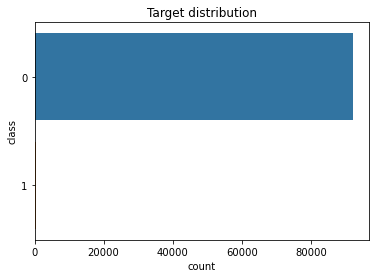

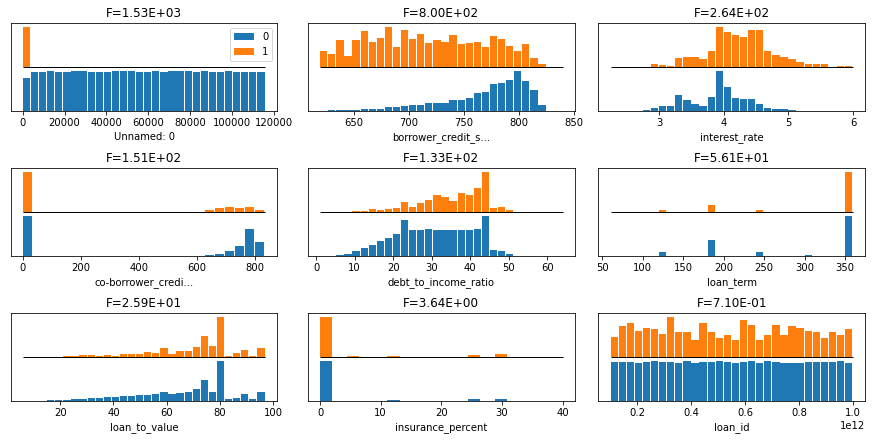

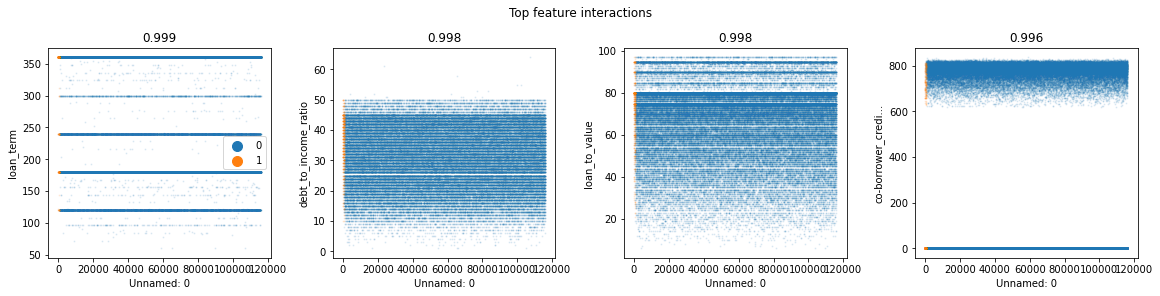

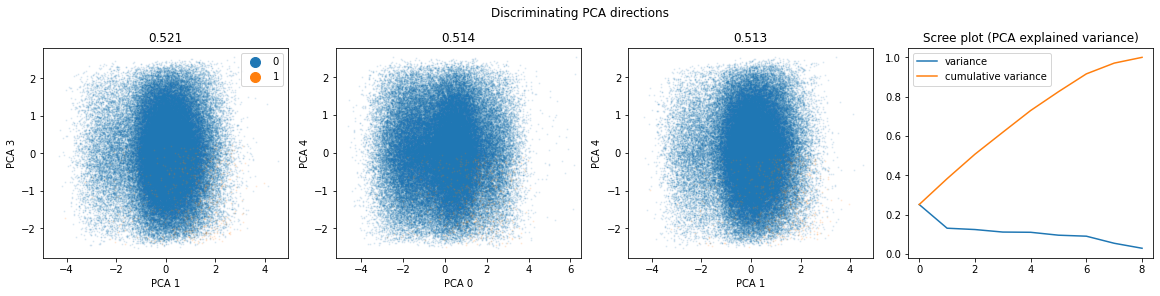

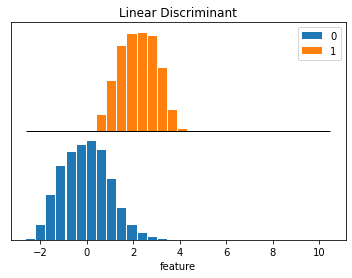

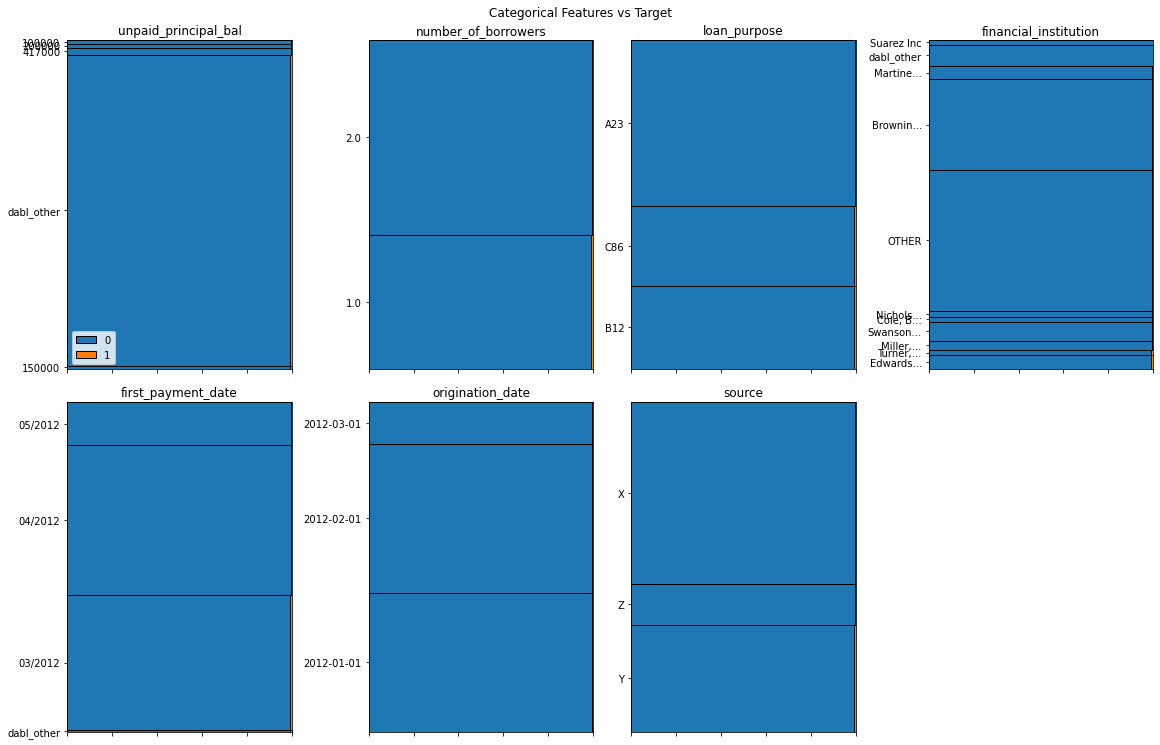

In [93]:
dabl.plot(train,y='m13')

## Merge train test


In [129]:
df = train.append(test)

In [130]:
df.isnull().sum(),train.dtypes

(Unnamed: 0                      0
 loan_id                         0
 source                          0
 financial_institution           0
 interest_rate                   0
 unpaid_principal_bal            0
 loan_term                       0
 origination_date                0
 first_payment_date              0
 loan_to_value                   0
 number_of_borrowers             0
 debt_to_income_ratio            0
 borrower_credit_score           0
 loan_purpose                    0
 insurance_percent               0
 co-borrower_credit_score        0
 insurance_type                  0
 m1                              0
 m2                              0
 m3                              0
 m4                              0
 m5                              0
 m6                              0
 m7                              0
 m8                              0
 m9                              0
 m10                             0
 m11                             0
 m12                

In [131]:
df['source'].unique()

array(['Y', 'X', 'Z'], dtype=object)

In [132]:
df['financial_institution'].unique()

array(['Martinez, Duffy and Bird', 'Swanson, Newton and Miller', 'OTHER',
       'Turner, Baldwin and Rhodes', 'Browning-Hart',
       'Sanchez, Hays and Wilkerson', 'Anderson-Taylor',
       'Cole, Brooks and Vincent', 'Nicholson Group',
       'Miller, Mcclure and Allen', 'Edwards-Hoffman',
       'Romero, Woods and Johnson', 'Suarez Inc',
       'Taylor, Hunt and Rodriguez', 'Chapman-Mcmahon', 'Richardson Ltd',
       'Richards-Walters', 'Sanchez-Robinson', 'Thornton-Davis'],
      dtype=object)

In [133]:
df['loan_purpose'].unique()

array(['B12', 'C86', 'A23'], dtype=object)

In [134]:
df['m13'].value_counts()

0.0    92341
1.0      505
Name: m13, dtype: int64

In [135]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [136]:
df['origination_date'] = pd.to_datetime(df['origination_date'])
df['org_month'],df['org_day'],df['org_year'] =df['origination_date'].dt.month,df['origination_date'].dt.day,df['origination_date'].dt.year
#df['org_year'] = df['origination_date'].dt.year


In [137]:
df['first_payment_date']=pd.to_datetime(df['first_payment_date'])
df['fst_month'],df['fst_day'],df['fst_year'] =df['first_payment_date'].dt.month,df['first_payment_date'].dt.day,df['first_payment_date'].dt.year
df.drop(['first_payment_date','origination_date'],1,inplace=True)

In [140]:
pd.set_option('Display.max_columns',None)

In [141]:
df.dtypes

Unnamed: 0                    int64
loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
m13                         

In [142]:
#cat_columns = ['source', 'financial_institution', 'loan_purpose','loan_term','insurance_type','number_of_borrowers','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']
cat_columns = []
for col in df.select_dtypes('object').columns:
    print(col)
    cat_columns.append(col)
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])

source
financial_institution
loan_purpose


In [143]:
df.columns

Index(['Unnamed: 0', 'loan_id', 'source', 'financial_institution',
       'interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13', 'org_month', 'org_day', 'org_year',
       'fst_month', 'fst_day', 'fst_year'],
      dtype='object')

In [144]:
df.nunique()

Unnamed: 0                  116058
loan_id                     116058
source                           3
financial_institution           19
interest_rate                  923
unpaid_principal_bal           646
loan_term                      140
loan_to_value                   92
number_of_borrowers              2
debt_to_income_ratio            58
borrower_credit_score          221
loan_purpose                     3
insurance_percent               14
co-borrower_credit_score       216
insurance_type                   2
m1                               4
m2                               5
m3                               6
m4                               7
m5                               8
m6                               9
m7                              10
m8                              10
m9                              11
m10                             12
m11                             13
m12                             13
m13                              2
org_month           

In [145]:
train['Unnamed: 0'].nunique()

92846

In [146]:
df.columns

Index(['Unnamed: 0', 'loan_id', 'source', 'financial_institution',
       'interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13', 'org_month', 'org_day', 'org_year',
       'fst_month', 'fst_day', 'fst_year'],
      dtype='object')

In [147]:
df_bac = df.copy()

In [148]:
df=df_bac.copy()

In [149]:
testm13=df[df['m13'].isnull()]
df.dropna(inplace=True)
X,y= df.drop(['loan_id','m13','Unnamed: 0'],1),df['m13']

In [119]:
cat_features_index = [i for i,col in enumerate(X.columns) if col in cat_columns]
cat_features_index

[0, 1, 9]

In [85]:
for x in cat_columns:
    X[x] = X[x].astype(str)
    testm13[x] = testm13[x].astype(str)

<ipython-input-85-82d64f8eb8b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testm13[x] = testm13[x].astype(str)


In [150]:
testm13

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,org_month,org_day,org_year,fst_month,fst_day,fst_year
0,68426,780423564300,0,8,3.375,144000,180,73,2.0,20.0,790.0,0,0.0,797.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,1,2012,3,1,2012
1,49544,472138003270,1,1,4.375,110000,360,88,1.0,45.0,779.0,2,25.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,1,2012,3,1,2012
2,96751,233667097068,0,1,4.125,243000,240,70,2.0,40.0,727.0,1,0.0,705.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2,1,2012,4,1,2012
3,112058,117580972208,0,8,2.875,189000,120,64,2.0,35.0,798.0,0,0.0,793.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,3,1,2012,5,1,2012
4,85610,440010429529,2,8,4.000,141000,360,84,2.0,31.0,819.0,0,12.0,799.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,3,1,2012,5,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23207,96588,615222850589,2,7,4.000,417000,360,70,2.0,33.0,748.0,2,0.0,793.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,3,1,2012,4,1,2012
23208,41278,321744581995,0,15,3.375,369000,180,44,2.0,20.0,802.0,0,0.0,802.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2,1,2012,4,1,2012
23209,85093,892252750536,0,8,4.125,191000,360,52,2.0,9.0,782.0,0,0.0,782.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,1,2012,3,1,2012
23210,107245,793322349724,0,8,3.250,318000,180,44,2.0,16.0,745.0,0,0.0,732.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2,1,2012,4,1,2012


In [151]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size = 0.15 )

In [73]:
from catboost import CatBoostClassifier, Pool

In [82]:
params = {
    'cat_features': cat_features_index,
    'eval_metric': 'F1',
    'random_seed': 1,
    'n_estimators': 1000,
     'auto_class_weights':'Balanced'

}


In [154]:
bst = CatBoostClassifier(eval_metric='F1', early_stopping_rounds=200)
_ = bst.fit(X_train, y_train, eval_set=(X_test,y_test), plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [113]:
X_train.dtypes

source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
org_month                     int64
org_day                       int64
org_year                    

In [66]:
new = CatBoostClassifier(eval_metric='F1' ,auto_class_weights='Balanced')
_ = new.fit(X_train, y_train, eval_set=(X_test,y_test), plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [67]:
sub['m13'] = new.predict(test.drop(['Unnamed: 0','loan_id','m13'],1))
sub['m13'].value_counts()


0    20909
1     2303
Name: m13, dtype: int64

In [57]:
sub['m13'].value_counts()

0    21255
1     1957
Name: m13, dtype: int64

In [68]:
sub.to_csv('6god.csv',index=False)

In [69]:
test

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,org_month,org_day,org_year,fst_month,fst_day,fst_year
0,68426,780423564300,0,8,3.375,144000,180,73,2.0,20.0,790.0,0,0.0,797.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2012,3,1,2012
1,49544,472138003270,1,1,4.375,110000,360,88,1.0,45.0,779.0,2,25.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2012,3,1,2012
2,96751,233667097068,0,1,4.125,243000,240,70,2.0,40.0,727.0,1,0.0,705.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2012,4,1,2012
3,112058,117580972208,0,8,2.875,189000,120,64,2.0,35.0,798.0,0,0.0,793.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2012,5,1,2012
4,85610,440010429529,2,8,4.000,141000,360,84,2.0,31.0,819.0,0,12.0,799.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2012,5,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23207,96588,615222850589,2,7,4.000,417000,360,70,2.0,33.0,748.0,2,0.0,793.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2012,4,1,2012
23208,41278,321744581995,0,15,3.375,369000,180,44,2.0,20.0,802.0,0,0.0,802.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2012,4,1,2012
23209,85093,892252750536,0,8,4.125,191000,360,52,2.0,9.0,782.0,0,0.0,782.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2012,3,1,2012
23210,107245,793322349724,0,8,3.250,318000,180,44,2.0,16.0,745.0,0,0.0,732.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2012,4,1,2012


In [70]:
sub

,Unnamed: 0,m13
0,68426,0
1,49544,0
2,96751,0
3,112058,0
4,85610,0
...,...,...
23207,96588,0
23208,41278,0
23209,85093,0
23210,107245,0


In [98]:
y_train.value_counts()

0.0    83106
1.0      455
Name: m13, dtype: int64

In [25]:
401/73875


0.005428087986463621

F1 score (array([0.99645877, 0.45555556]), 0)
F1 score (array([0.99645877, 0.45555556]), 1)
F1 score (array([0.99645877, 0.45555556]), 2)
F1 score (array([0.99645877, 0.45555556]), 3)


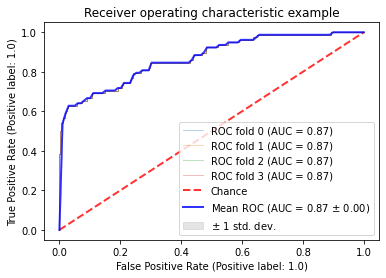

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn import svm, datasets
from sklearn.metrics import auc,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score,plot_roc_curve
# #############################################################################
# Data IO and generation

# # Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# X, y = X[y != 2], y[y != 2]
# n_samples, n_features = X.shape

# # Add noisy features
# random_state = np.random.RandomState(0)
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=4, random_state=1,shuffle=True)
classifier = XGBClassifier(learning_rate=0.18,
                            scale_pos_weight=float(np.sum(y_train == 0)) / np.sum(y_train == 1),
                           n_estimators=200)
#classifier = RandomForestClassifier(n_estimators=200)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X_train,y_train)
    viz = plot_roc_curve(classifier, X_test,y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    predicted = classifier.predict(X_test)
    print(f'F1 score {f1_score(y_test, predicted, average=None),i}')

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()


In [111]:
X_train.dtypes

source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
org_month                     int64
org_day                       int64
org_year                    

In [43]:
pip install dabl

In [44]:
y_train

17646    0.0
80443    0.0
37216    0.0
25240    0.0
40493    0.0
        ... 
21440    0.0
73349    0.0
50057    0.0
5192     0.0
77708    0.0
Name: m13, Length: 78919, dtype: float64

In [46]:
ec = dabl.SimpleClassifier(refit=False,random_state=0).fit(X_train,y=y_train) 


C:\Users\rushi\anaconda3\lib\site-packages\dabl\preprocessing.py:351: UserWarning: Discarding near-constant features: ['insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']
  warn("Discarding near-constant features: {}".format(


ValueError: too many values to unpack (expected 2)

In [51]:
(np.sum(y_train == 0)) / np.sum(y_train == 1)

183.82201405152225

In [180]:
model = RandomForestClassifier(random_state=42,max_depth= 10 ,min_samples_split= 5 ,n_estimators= 500,n_jobs=-1, min_samples_leaf=2,  criterion='entropy',class_weight='balanced').fit(X,y)

In [176]:
pred = model.predict(X_test)

In [177]:
confusion_matrix(y_test,pred)

array([[13388,   461],
       [   23,    55]], dtype=int64)

In [178]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     13849
         1.0       0.11      0.71      0.19        78

    accuracy                           0.97     13927
   macro avg       0.55      0.84      0.58     13927
weighted avg       0.99      0.97      0.98     13927



In [181]:
testm13['m13'] = model.predict(testm13.drop(['Unnamed: 0','loan_id','m13'],1))
testm13[['Unnamed: 0','m13']].to_csv('1 3god.csv',index=False)
testm13['m13'].value_counts()

<ipython-input-181-37e29c0f4a41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testm13['m13'] = model.predict(testm13.drop(['Unnamed: 0','loan_id','m13'],1))


0.0    22258
1.0      954
Name: m13, dtype: int64

In [169]:
sub['m13'].value_counts()

0    23211
1        1
Name: m13, dtype: int64

In [50]:
sub.to_csv('3god.csv',index=False)